## 911 Data Visualization

## Click here to download [ 911 dataset](https://www.kaggle.com/mchirico/montcoalert)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


### Top 5 zip code

In [6]:
df['zip'].value_counts().head() 

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

### Top 5 Townships (twp) for 911 calls

In [7]:
df['twp'].value_counts().head() 

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

### unique title and number of unique title



In [8]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [9]:
df['title'].nunique()

141

### Parsing Title Column

splitting EMS: BACK PAINS/INJURY, and saving the reason in a REASON column

In [10]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

### Most Common Reason for 911 calls

In [11]:
df['Reason'].value_counts().head(1)

EMS    208676
Name: Reason, dtype: int64

### Histogram for resons for 911 calls

In [12]:
import seaborn as sns

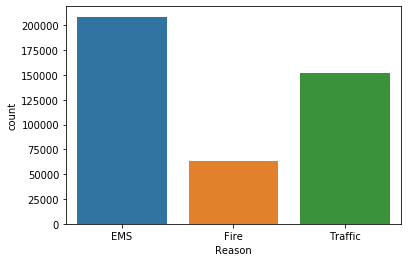

In [13]:
sns.countplot(x='Reason',data = df)

### Coverting the string type of timestamp to pandas date_time Object

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [15]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

### Coverting timestamp column to hour date

In [16]:
df['Day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [17]:
df['Day of week'].iloc[0]

3

In [18]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:10:52')

### Mapping day of week with the actual string

In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

In [20]:
df['Day of week'] = df['Day of week'].apply(lambda day: dmap[day])

In [21]:
df['Day of week'].head(5)

0    Thur
1    Thur
2    Thur
3    Thur
4    Thur
Name: Day of week, dtype: object

### CountPlot of Day of Week with huhe based on Reason Column

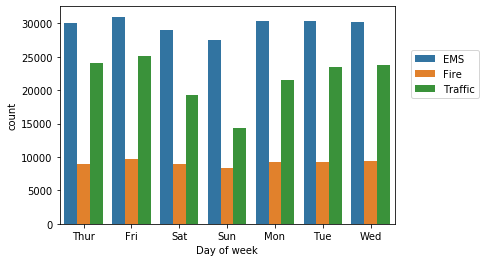

In [22]:
sns.countplot(x = 'Day of week',data = df,hue= 'Reason',alpha = 1)
plt.legend(bbox_to_anchor = (1.05,0.8),loc = 2,borderaxespad =0)


### Same for Month Column

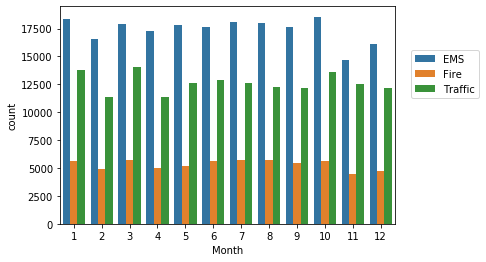

In [23]:
sns.countplot(x = 'Month',data = df,hue= 'Reason',alpha = 1)
plt.legend(bbox_to_anchor = (1.05,0.8),loc = 2,borderaxespad =0)


### Grouping based on month

In [24]:
grpby = df.groupby('Month').count()

In [25]:
grpby

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of week,Hour
Month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644
6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,36171,36171
7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,36405,36405
8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,35972,35972
9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,35339,35339


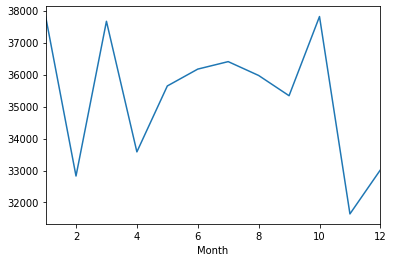

In [26]:
grpby['lat'].plot()

### Regression plot on number of calls per month

In [27]:
reset = grpby.reset_index('Month')

In [28]:
reset

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of week,Hour
0,1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
1,2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
2,3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
3,4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
4,5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644
5,6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,36171,36171
6,7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,36405,36405
7,8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,35972,35972
8,9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,35339,35339
9,10,37815,37815,37815,32919,37815,37815,37809,37815,37815,37815,37815,37815


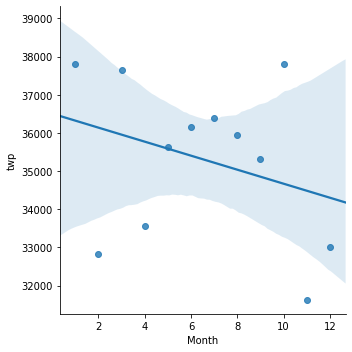

In [29]:
sns.lmplot(x='Month',y='twp',data = reset)

In [31]:
df['Date'] = df['timeStamp'].apply(lambda ts: ts.date())

In [32]:
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

In [33]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of week,Month,Hour,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thur,12,17,2015-12-10


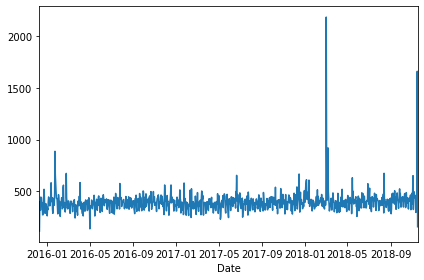

In [34]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [35]:
df['Reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

### Number of calls per month where Reason are Traffic,Fire and EMS

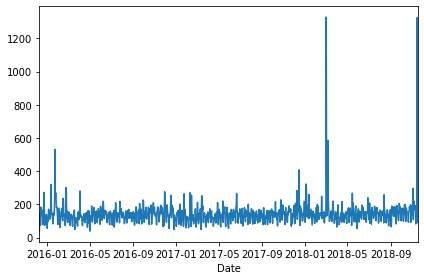

In [36]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

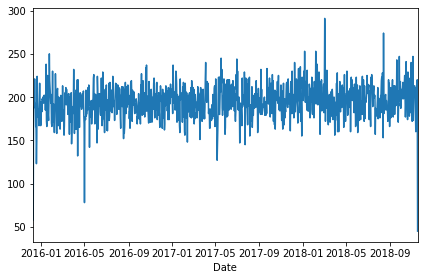

In [37]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

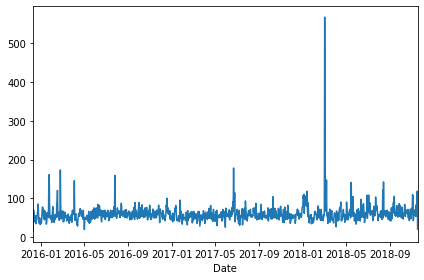

In [38]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

### creating a multi-level indexing of days of week and hours to know the number of calls per hour on a particular day

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 14 columns):
lat            423909 non-null float64
lng            423909 non-null float64
desc           423909 non-null object
zip            371780 non-null float64
title          423909 non-null object
timeStamp      423909 non-null datetime64[ns]
twp            423750 non-null object
addr           423909 non-null object
e              423909 non-null int64
Reason         423909 non-null object
Day of week    423909 non-null object
Month          423909 non-null int64
Hour           423909 non-null int64
Date           423909 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 45.3+ MB


In [40]:
# converting multilevel indexing to matrix format using unstack()

dayhour = df.groupby(['Day of week','Hour']).count()['Reason'].unstack()

### Creating a Heat map

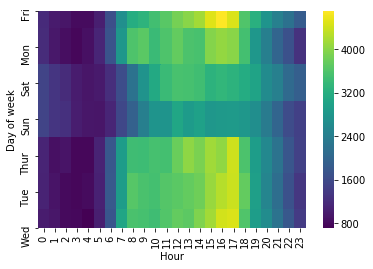

In [41]:
sns.heatmap(data = dayhour,cmap='viridis')

### Creating a clustermap

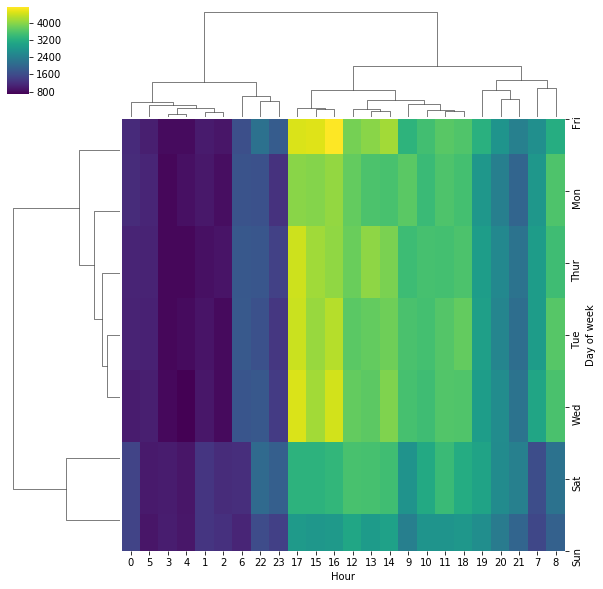

In [42]:
sns.clustermap(data = dayhour,cmap = 'viridis')

### Same Procedure for Month and Day of weeks

In [43]:
daymonth = df.groupby(['Day of week','Month']).count()['Reason'].unstack()
daymonth.head(2)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of week,,,,,,,,,,,,
Fri,5532,4848,7344,5195,4989,5867,5380,5312,6010,5179,4525,5570
Mon,5716,5214,4663,5154,5019,5045,5792,5212,4675,6385,4157,4286


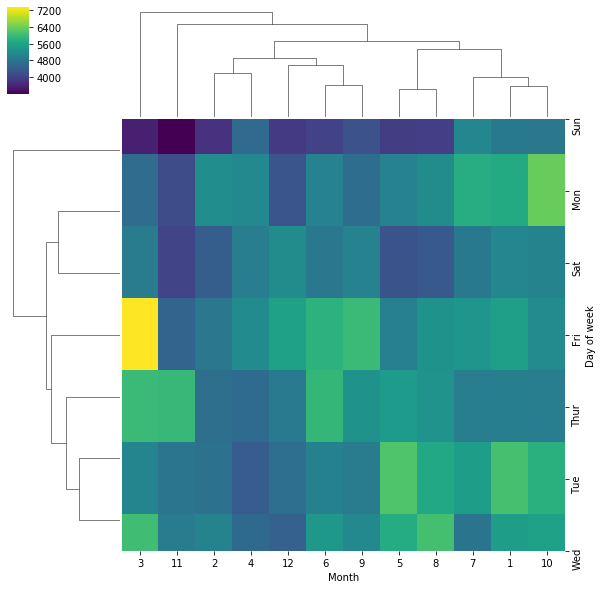

In [44]:
sns.clustermap(data = daymonth,cmap = 'viridis')